In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.


In [2]:
df = pd.read_csv("funds.csv", sep = ";", decimal=",", encoding="latin1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133281 entries, 0 to 133280
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TP_FUNDO           133281 non-null  object 
 1   CNPJ_FUNDO         133281 non-null  int64  
 2   DENOM_SOCIAL       133281 non-null  object 
 3   DT_COMPTC          133281 non-null  object 
 4   TP_APLIC           133281 non-null  object 
 5   TP_ATIVO           133281 non-null  object 
 6   EMISSOR_LIGADO     133281 non-null  object 
 7   TP_NEGOC           0 non-null       float64
 8   QTDE_VENDA_NEGOC   133281 non-null  float64
 9   VL_VENDA_NEGOC     133281 non-null  float64
 10  QTDE_AQUIS_NEGOC   133281 non-null  float64
 11  VL_AQUIS_NEGOC     133281 non-null  float64
 12  QT_POS_FINAL       133281 non-null  float64
 13  VL_MERC_POS_FINAL  133281 non-null  float64
 14  DT_CONFID_APLIC    133281 non-null  object 
 15  CNPJ_FUNDO_COTA    133281 non-null  int64  
 16  NM

In [4]:
funds = df[["CNPJ_FUNDO", "DENOM_SOCIAL", "VL_MERC_POS_FINAL", "CNPJ_FUNDO_COTA", "NM_FUNDO_COTA"]]

In [5]:
#funds_sample = funds.sample(100)
funds_sample = funds[funds["DENOM_SOCIAL"] == "VERDE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO"]
min_max_scaler = MinMaxScaler()
normalized = min_max_scaler.fit_transform(funds_sample[["VL_MERC_POS_FINAL"]])
#normalized = [float(i) for i in normalized]
funds_sample["VLR"] = normalized

<ipython-input-5-323b751b00e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funds_sample["VLR"] = normalized


In [6]:
funds_sample.head()

,CNPJ_FUNDO,DENOM_SOCIAL,VL_MERC_POS_FINAL,CNPJ_FUNDO_COTA,NM_FUNDO_COTA,VLR
9893,7455507000189,VERDE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO,3072272.17,4335156000184,VERDE AM YIELD FUNDO DE INVESTIMENTO RENDA FIX...,0.125250
9894,7455507000189,VERDE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO,3072272.17,4335156000184,VERDE AM YIELD FUNDO DE INVESTIMENTO RENDA FIX...,0.125250
9895,7455507000189,VERDE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO,6607419.56,34081680000137,FIC FIM XP SPECIAL SITUATIONS I CAPITAL CRÉDIT...,0.269671
9896,7455507000189,VERDE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO,6430906.60,34081690000172,FIC FIM XP SPECIAL SITUATIONS I MEZANINO CRÉDI...,0.262460
9897,7455507000189,VERDE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO,7461846.52,8417544000165,CRÉDITO UNIVERSITÁRIO FIDC,0.304576


In [7]:
funds_sample[["CNPJ_FUNDO","DENOM_SOCIAL","VL_MERC_POS_FINAL"]].groupby(["CNPJ_FUNDO","DENOM_SOCIAL"]).sum()

,,VL_MERC_POS_FINAL
CNPJ_FUNDO,DENOM_SOCIAL,
7455507000189,VERDE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO,1.788602e+08


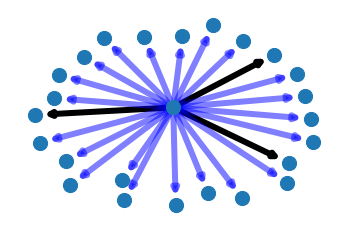

In [8]:
G = nx.DiGraph()
for index, row in funds_sample.iterrows():
    G.add_edge(row["CNPJ_FUNDO"], row["CNPJ_FUNDO_COTA"],   weight = row["VLR"])

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=200)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b"
)


plt.axis("off")
plt.show()
